<a href="https://colab.research.google.com/github/KOWilliams/KOWilliams/blob/main/Sickle_Cell_Anemia_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'anemia-diagnosis-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1290709%2F2150619%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240218%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240218T181026Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7b3ebcba0405ef3b2e21d7ab7b651bfa80b90acf763791cd6397c2d270d648a5ca5988217a7f8ba224713a5f4792dc7b4d00052569e78127740bd252438f439e2eb84c43e567abbf5bfad66d8bafcc95c2462c788aa3e30eb3fda670b356c72b03413a1c24bc226e9ce9af1250862a9b4e1d789643504f6b6dd75849e7c24fa677dde117879060e7a7f0a94d6372c55cef4d9c26e7b7b893961178b2121a142a394f51cdcf09915f4787c2ed6b32d716840ddda1203e1959fde4aa845cfddfa2e8cad5cb27f540a58a5b2fba6e93a0d227f95c81f0a32cf7e1ea35bfa03d464e02a3acff9aba5f1e5824c047cdcfbbe53ff9353292ce5dfa3838d2da00303af9'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 7743 bytes downloaded
Downloaded and uncompressed: anemia-diagnosis-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anemia-diagnosis-dataset/CBC data_for_meandeley_csv.csv


In [ ]:
df = pd.read_csv('/kaggle/input/anemia-diagnosis-dataset/CBC data_for_meandeley_csv.csv')
df.head()

,S. No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT /mm3,HGB
0,NaN,NaN,NaN,Red Blood Cell count,Packed Cell Volume,Mean Cell Volume,Mean Cell Hemoglobin,NaN,Red Cell Distribution width,"White Blood Cell (WBC count),",Platelet,Hemoglobin
1,1.0,28.0,0.0,5.66,34,60.1,17,28.2,20,11.1,128.3,9.6
2,2.0,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13,7.02,419,13.8
3,3.0,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13,8.09,325,13.4
4,4.0,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264,11.3


In [ ]:
df.columns

Index(['S. No.', 'Age      ', 'Sex  ', '  RBC    ', 'PCV', 'MCV  ', 'MCH',
       ' MCHC  ', ' RDW    ', 'TLC', ' PLT /mm3', ' HGB '],
      dtype='object')

In [ ]:
df.dtypes

S. No.       float64
Age          float64
Sex          float64
  RBC         object
PCV           object
MCV           object
MCH           object
 MCHC        float64
 RDW          object
TLC           object
 PLT /mm3     object
 HGB          object
dtype: object

In [ ]:
df.drop(0, axis=0, inplace=True)
df.head()

,S. No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT /mm3,HGB
1,1.0,28.0,0.0,5.66,34,60.1,17,28.2,20,11.1,128.3,9.6
2,2.0,41.0,0.0,4.78,44.5,93.1,28.9,31.0,13,7.02,419,13.8
3,3.0,40.0,1.0,4.65,41.6,89.5,28.8,32.2,13,8.09,325,13.4
4,4.0,76.0,0.0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264,11.3
5,5.0,20.0,1.0,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196,11.5


In [ ]:
df = df.astype('float64')

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
df.tail()

,S. No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT /mm3,HGB
360,360.0,17.0,0.0,4.86,39.2,80.7,27.7,34.4,13.4,4.40,180.0,13.5
361,361.0,51.0,0.0,4.85,35.2,91.7,31.0,33.8,13.3,5.60,215.0,15.0
362,362.0,21.0,1.0,4.47,39.7,88.7,29.3,33.0,13.5,9.20,329.0,13.1
363,363.0,35.0,1.0,4.75,36.2,86.7,27.9,32.1,13.5,6.48,174.0,13.2
364,364.0,26.0,0.0,4.95,44.4,89.7,30.6,34.2,12.3,8.80,279.0,15.2


In [ ]:
df.dtypes

S. No.       float64
Age          float64
Sex          float64
  RBC        float64
PCV          float64
MCV          float64
MCH          float64
 MCHC        float64
 RDW         float64
TLC          float64
 PLT /mm3    float64
 HGB         float64
dtype: object

In [ ]:
df.corr()

,S. No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT /mm3,HGB
S. No.,1.000000,0.051263,0.120786,-0.025623,-0.016503,-0.000988,0.157555,0.204934,-0.127601,0.027507,0.032725,0.095855
Age,0.051263,1.000000,-0.096953,-0.121013,-0.091488,0.029824,0.055131,0.092982,-0.014405,0.232505,-0.018868,-0.089315
Sex,0.120786,-0.096953,1.000000,-0.223250,-0.285619,-0.150611,-0.229228,-0.200581,0.138318,0.022214,0.117968,-0.373981
RBC,-0.025623,-0.121013,-0.223250,1.000000,0.791414,-0.346350,-0.405315,-0.195765,-0.233634,0.070206,0.039208,0.746524
PCV,-0.016503,-0.091488,-0.285619,0.791414,1.000000,0.160614,-0.018626,-0.209509,-0.312195,0.059052,-0.030149,0.853293
MCV,-0.000988,0.029824,-0.150611,-0.346350,0.160614,1.000000,0.774251,0.052354,-0.019982,-0.079189,-0.122880,0.179613
MCH,0.157555,0.055131,-0.229228,-0.405315,-0.018626,0.774251,1.000000,0.607971,-0.215952,-0.167904,-0.204836,0.250952
MCHC,0.204934,0.092982,-0.200581,-0.195765,-0.209509,0.052354,0.607971,1.000000,-0.290124,-0.162950,-0.189686,0.204836
RDW,-0.127601,-0.014405,0.138318,-0.233634,-0.312195,-0.019982,-0.215952,-0.290124,1.000000,-0.049383,0.064065,-0.459526
TLC,0.027507,0.232505,0.022214,0.070206,0.059052,-0.079189,-0.167904,-0.162950,-0.049383,1.000000,0.234198,-0.043545


<Axes: >

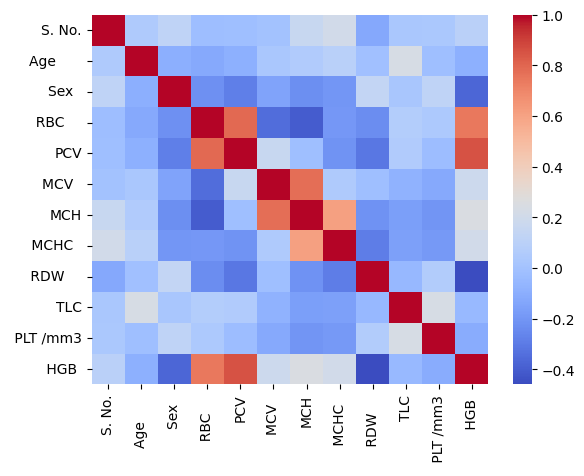

In [ ]:
sns.heatmap(df.corr(), cmap = 'coolwarm')

<Axes: xlabel='  RBC    ', ylabel=' HGB '>

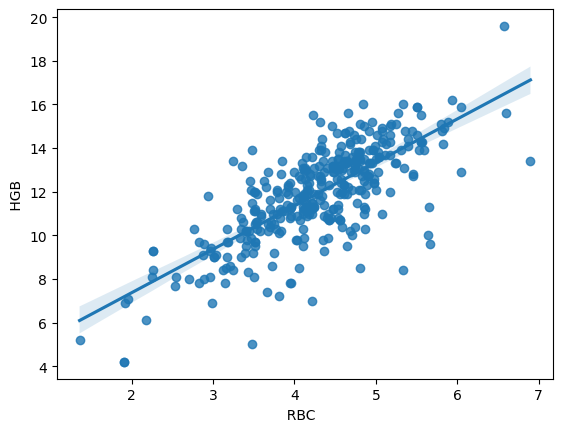

In [ ]:
sns.regplot(x='  RBC    ', y=' HGB ', data=df)

In [ ]:
import pandas as pd

data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'RBC': [4.5, 4.8, 5.2, 4.6, 4.9, 5.0],
    'PCV': [41, 38, 43, 40, 42, 39],
    'HGB': [14, 12, 15, 13, 14.5, 12.5],
    'MCV': [90, 80, 95, 88, 92, 84],
    'MCH': [30, 28, 32, 29, 31, 27],
    'MCHC': [33, 30, 34, 31, 33.5, 29],
    'RDW': [12, 13, 11, 13.5, 12.5, 13],
    'Platelets': [200000, 180000, 220000, 190000, 210000, 200000],
    'WBC': [7000, 8000, 7500, 8200, 7300, 8100],
}
df = pd.DataFrame(data)

df = pd.DataFrame(data)

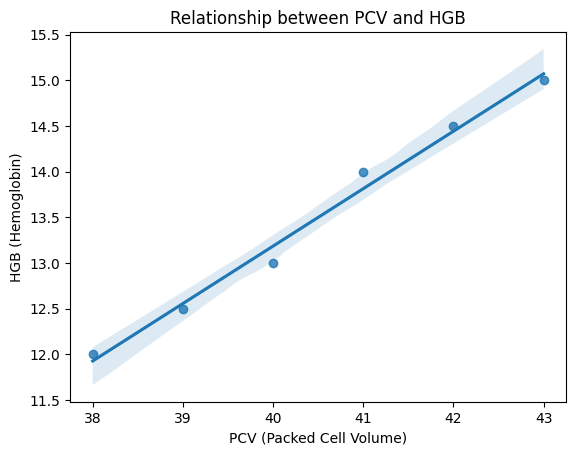

In [ ]:
# Removing extra spaces in column names
df.columns = df.columns.str.strip()

# Use regplot with corrected column names
sns.regplot(x='PCV', y='HGB', data=df)
plt.xlabel('PCV (Packed Cell Volume)')
plt.ylabel('HGB (Hemoglobin)')
plt.title('Relationship between PCV and HGB')
plt.show()


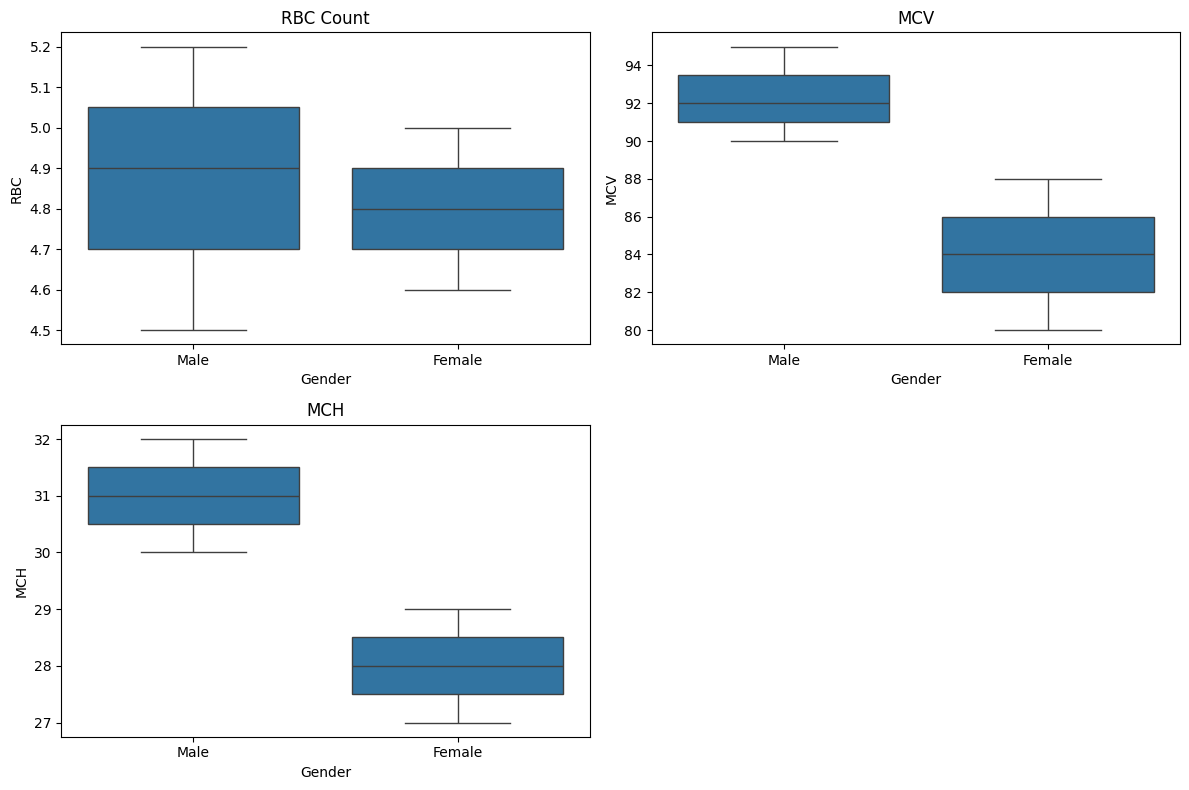

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data frame is named 'df'
# 'Gender' is the column containing gender information, and 'RBC', 'MCV', 'MCH' are the blood parameters

plt.figure(figsize=(12, 8))

# Box plot for RBC
plt.subplot(2, 2, 1)
sns.boxplot(x='Gender', y='RBC', data=df)
plt.title('RBC Count')

# Box plot for MCV
plt.subplot(2, 2, 2)
sns.boxplot(x='Gender', y='MCV', data=df)
plt.title('MCV')

# Box plot for MCH
plt.subplot(2, 2, 3)
sns.boxplot(x='Gender', y='MCH', data=df)
plt.title('MCH')

plt.tight_layout()
plt.show()


In [ ]:
from scipy import stats

# Assuming your dataset is stored in a DataFrame named 'df'
# Specify the blood parameters for analysis
blood_parameters = ['RBC', 'MCV', 'MCH']

for param in blood_parameters:
    # Separate data by gender
    group1 = df[df['Gender'] == 'Male'][param]
    group2 = df[df['Gender'] == 'Female'][param]

    # Check normality assumption using Shapiro-Wilk test
    _, p_value_normality_group1 = stats.shapiro(group1)
    _, p_value_normality_group2 = stats.shapiro(group2)

    # Set significance level for normality test (e.g., 0.05)
    alpha_normality = 0.05

    # Choose the appropriate test based on normality
    if p_value_normality_group1 > alpha_normality and p_value_normality_group2 > alpha_normality:
        # Perform independent t-test for normally distributed data
        t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
        test_used = 'Independent t-test'
    else:
        # Perform Mann-Whitney U test for non-normally distributed data
        u_stat, p_value = stats.mannwhitneyu(group1, group2)
        test_used = 'Mann-Whitney U test'

    # Print results
    print(f'Test for {param}:')
    print(f'Test used: {test_used}')
    print(f'P-value: {p_value:.4f}')
    print('\n')

Test for RBC:
Test used: Independent t-test
P-value: 0.7927


Test for MCV:
Test used: Independent t-test
P-value: 0.0475


Test for MCH:
Test used: Independent t-test
P-value: 0.0213




In [ ]:
from scipy import stats

# Specify the blood parameters for analysis
blood_parameters = ['RBC', 'MCV', 'MCH']

for param in blood_parameters:
    # Separate data by gender
    group1 = df[df['Gender'] == 'Male'][param]
    group2 = df[df['Gender'] == 'Female'][param]

    # Perform independent t-test
    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)

    # Calculate Cohen's d
    mean_diff = group1.mean() - group2.mean()
    pooled_std = ((len(group1) - 1) * group1.std()**2 + (len(group2) - 1) * group2.std()**2) / (len(group1) + len(group2) - 2)
    pooled_std = (pooled_std / (len(group1) + len(group2) - 2))**0.5
    cohen_d = mean_diff / pooled_std

    # Print results
    print(f'Test for {param}:')
    print(f'T-statistic: {t_stat:.4f}')
    print(f'P-value: {p_value:.4f}')
    print(f'Cohen\'s d: {cohen_d:.4f}')
    print('\n')

Test for RBC:
T-statistic: 0.2857
P-value: 0.7927
Cohen's d: 0.4666


Test for MCV:
T-statistic: 3.0542
P-value: 0.0475
Cohen's d: 4.9875


Test for MCH:
T-statistic: 3.6742
P-value: 0.0213
Cohen's d: 6.0000




### 1. Data Preparation
```python
# Sample data (replace this with your actual DataFrame)
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'RBC': [4.5, 4.8, 5.2, 4.6, 4.9, 5.0],
    # ... other columns ....
}

# Create a DataFrame from the sample data
df = pd.DataFrame(data)
```
This section initializes a sample dataset with columns like 'Gender', 'RBC', and potentially others. Replace this sample data with your actual dataset.

### 2. Exploratory Data Analysis (EDA)
```python
# Remove extra spaces in column names
df.columns = df.columns.str.strip()
```
This code removes leading and trailing spaces from column names, ensuring data consistency.

### 3. Data Visualization
```python
# Use regplot with corrected column names
sns.regplot(x='PCV', y='HGB', data=df)
plt.xlabel('PCV (Packed Cell Volume)')
plt.ylabel('HGB (Hemoglobin)')
plt.title('Relationship between PCV and HGB')
plt.show()
```
This code creates a regression plot (scatter plot with a regression line) to visualize the relationship between 'PCV' (Packed Cell Volume) and 'HGB' (Hemoglobin) in the dataset.

